# Global Agricultural Sustainability: Emissions, Inputs, Production & Food Supply

**Objective:**

The objective of this project is to investigate global agricultural systems across ten selected countries between 2010 and 2023. The objective of the present study is to analyse greenhouse gas emissions, fertiliser inputs, crop and livestock production, and food supply. The analysis will be used to identify trends, inefficiencies, and planning opportunities for sustainable agriculture.

**Scope of the Analysis**

The project uses four datasets from FAOSTAT, covering:

1) Emissions from agriculture and land use (CO₂eq)

2) Fertilizer use by nutrient (N, P₂O₅, K₂O)

3) Crop & Livestock production volumes

4) Food supply including dietary energy (kcal/cap/day)

The analysis focuses on these 10 countries:
Brazil, China, Ethiopia, India, Israel, Netherlands, Rwanda, UAE, USA, Viet Nam

The time frame is 2010 to 2022, allowing for decade-long trend evaluation.



## Library

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Datasets

In [59]:
emissions = pd.read_csv("Emission final.csv")
fertilizers = pd.read_csv("Fertilizers by Nutrient final.csv")
crops = pd.read_csv("Crops and Livestock products final.csv")
food_supply = pd.read_csv("Food Supply final.csv")


## Basic info()

In [60]:
emissions.info()
fertilizers.info()
crops.info()
food_supply.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1001 non-null   object 
 1   Domain            1001 non-null   object 
 2   Area Code (M49)   1001 non-null   int64  
 3   Area              1001 non-null   object 
 4   Element Code      1001 non-null   int64  
 5   Element           1001 non-null   object 
 6   Item Code         1001 non-null   int64  
 7   Item              1001 non-null   object 
 8   Year Code         1001 non-null   int64  
 9   Year              1001 non-null   int64  
 10  Source Code       1001 non-null   int64  
 11  Source            1001 non-null   object 
 12  Unit              1001 non-null   object 
 13  Value             1001 non-null   float64
 14  Flag              1001 non-null   object 
 15  Flag Description  1001 non-null   object 
dtypes: float64(1), int64(6), object(9)
memory 

In [61]:
emissions = emissions[(emissions["Year"] >= 2010) & (emissions["Year"] <= 2022)]
fertilizers = fertilizers[(fertilizers["Year"] >= 2010) & (fertilizers["Year"] <= 2022)]
crops = crops[(crops["Year"] >= 2010) & (crops["Year"] <= 2022)]
food_supply = food_supply[(food_supply["Year"] >= 2010) & (food_supply["Year"] <= 2022)]


## Filter 10 Countries

In [62]:
target_countries = [
    'Brazil', 'China', 'Ethiopia', 'India', 'Israel',
    'Netherlands (Kingdom of the)', 'Rwanda',
    'United Arab Emirates', 'United States of America', 'Viet Nam'
]

In [63]:
emissions = emissions[emissions["Area"].isin(target_countries)]
fertilizers = fertilizers[fertilizers["Area"].isin(target_countries)]
crops = crops[crops["Area"].isin(target_countries)]
food_supply = food_supply[food_supply["Area"].isin(target_countries)]


**Emissions**

In [64]:
print("Unique Emission Elements:")
print(emissions["Element"].unique())

print("Unique Emission Items:")
print(emissions["Item"].unique())


Unique Emission Elements:
['Emissions (CO2eq) (AR5)']
Unique Emission Items:
['Crop Residues' 'Rice Cultivation' 'Burning - Crop residues'
 'Enteric Fermentation' 'Manure Management' 'Manure left on Pasture'
 'Manure applied to Soils' 'Synthetic Fertilizers']


**Fertilizers**

In [65]:
print("Fertilizer Elements:")
print(fertilizers["Element"].unique())

print("Fertilizer Nutrients:")
print(fertilizers["Item"].unique())


Fertilizer Elements:
['Production' 'Import quantity' 'Export quantity' 'Agricultural Use'
 'Use per area of cropland' 'Use per capita']
Fertilizer Nutrients:
['Nutrient nitrogen N (total)' 'Nutrient phosphate P2O5 (total)'
 'Nutrient potash K2O (total)']


**Crops**

In [66]:
print("Crop Elements:")
print(crops["Element"].unique())

print("Crop Items:")
print(crops["Item"].value_counts().head(10))  # top 10 items


Crop Elements:
['Area harvested' 'Production' 'Yield' 'Yield/Carcass Weight']
Crop Items:
Item
Hen eggs in shell, fresh                           500
Maize (corn)                                       390
Other vegetables, fresh n.e.c.                     390
Potatoes                                           390
Unmanufactured tobacco                             361
Bananas                                            361
Mangoes, guavas and mangosteens                    351
Onions and shallots, dry (excluding dehydrated)    351
Tomatoes                                           351
Cabbages                                           351
Name: count, dtype: int64


**food_supply**

In [67]:
print("Food Supply Elements:")
print(food_supply["Element"].unique())

print("Food Supply Items:")
print(food_supply["Item"].value_counts().head(10))


Food Supply Elements:
['Production' 'Import quantity' 'Export quantity'
 'Food supply quantity (kg/capita/yr)' 'Food supply (kcal/capita/day)']
Food Supply Items:
Item
Wheat and products         650
Maize and products         650
Sweeteners, Other          650
Potatoes and products      650
Fruits, other              650
Vegetables, other          650
Freshwater Fish            650
Milk - Excluding Butter    650
Bovine Meat                649
Eggs                       644
Name: count, dtype: int64


## Units

In [68]:
print(emissions["Unit"].unique())
print(fertilizers["Unit"].unique())
print(crops["Unit"].unique())
print(food_supply["Unit"].unique())


['kt']
['t' 'kg/ha' 'kg/cap']
['ha' 't' 'kg/ha' 'No/An' 'g/An' '1000 No' 'kg/An']
['1000 t' 'kg/cap' 'kcal/cap/d']


# Questions

## Q1: Which countries emit the most greenhouse gases from agriculture?

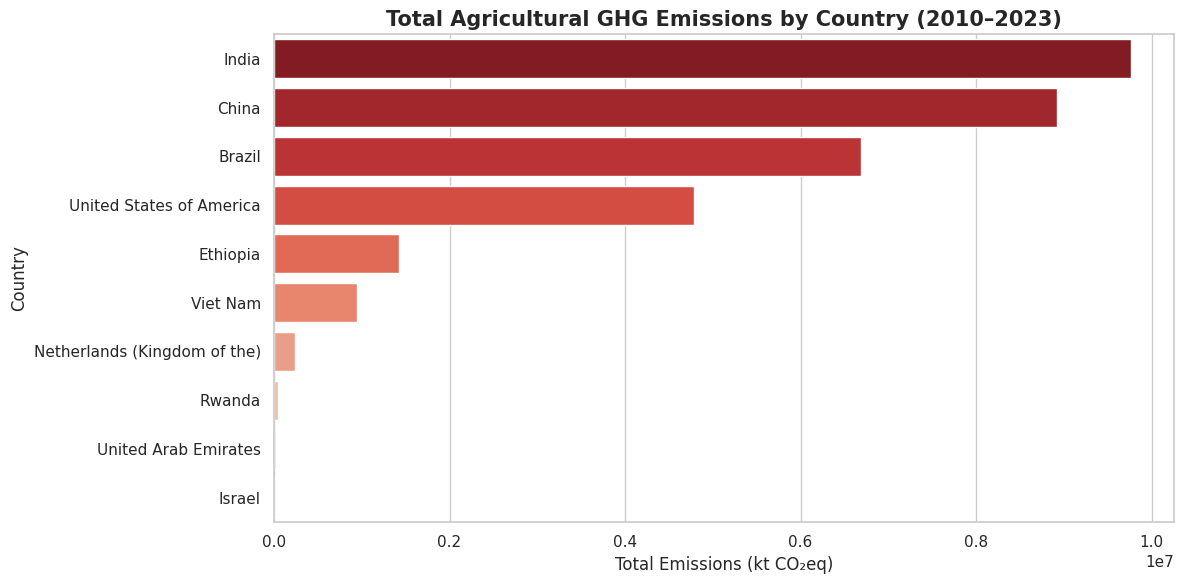

In [73]:
# Plot with clean font and correct hue usage
plt.rcParams['font.family'] = 'DejaVu Sans'  # Use a font that supports subscript

plt.figure(figsize=(12, 6))
sns.barplot(
    data=emissions_by_country,
    x="Value", y="Area",
    hue="Area", palette="Reds_r",
    dodge=False, legend=False
)
plt.title("Total Agricultural GHG Emissions by Country (2010–2023)", fontsize=15, weight='bold')
plt.xlabel("Total Emissions (kt CO₂eq)", fontsize=12)  # or use CO2eq for safety
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()


## Q2:  Which countries have reduced their agricultural emissions the most over time?

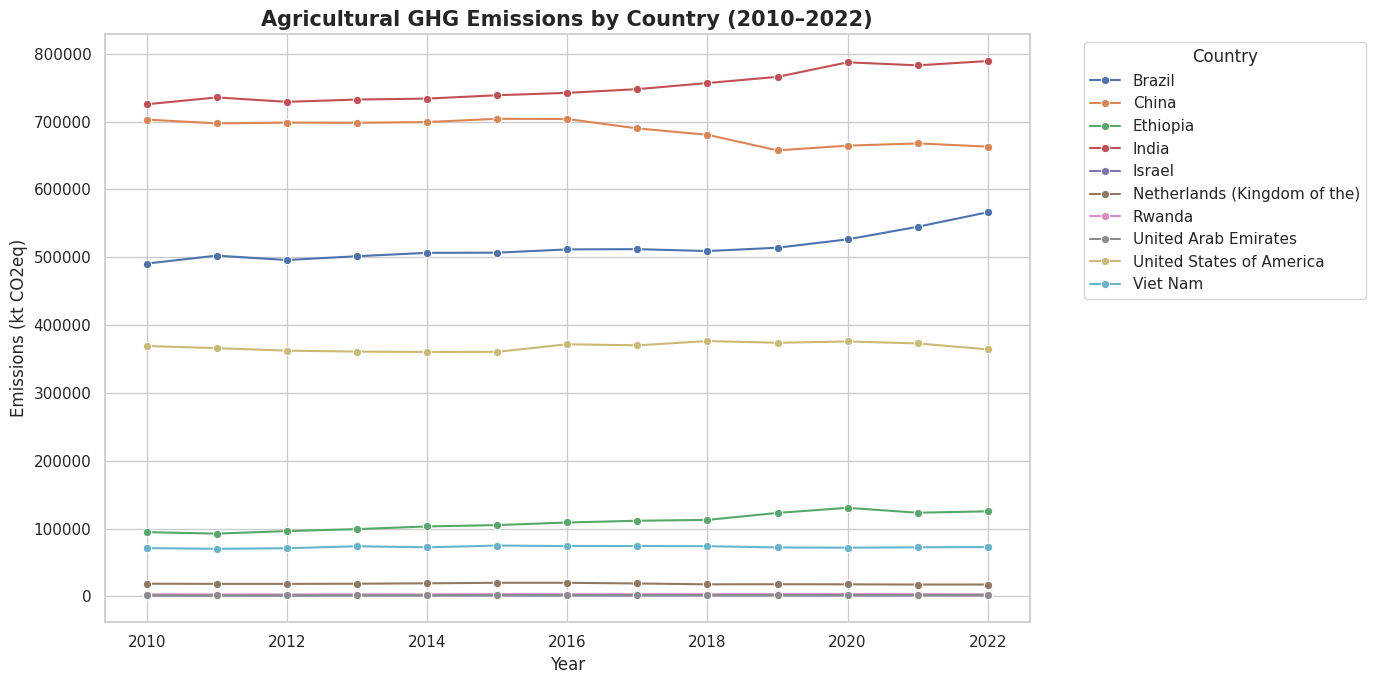

In [75]:
# Filter and group emissions data
emissions_trend = emissions[
    (emissions["Element"] == "Emissions (CO2eq) (AR5)") &
    (emissions["Year"].between(2010, 2022))
].groupby(["Area", "Year"])["Value"].sum().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=emissions_trend, x="Year", y="Value", hue="Area", marker="o")
plt.title("Agricultural GHG Emissions by Country (2010–2022)", fontsize=15, weight='bold')
plt.xlabel("Year")
plt.ylabel("Emissions (kt CO2eq)")  # use plain text to avoid glyph warnings
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Q3: Which emission sources are the largest (e.g., livestock, land use, supply chain)?

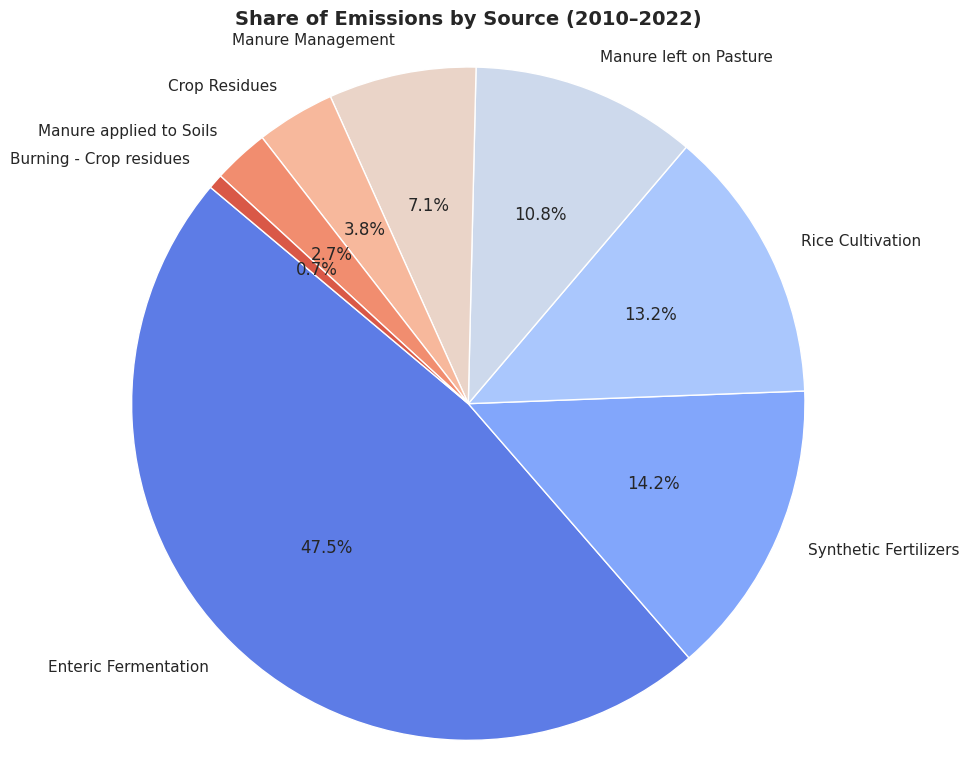

In [76]:
# Group emissions by source (Item) from 2010–2022
source_summary = emissions[
    (emissions["Element"] == "Emissions (CO2eq) (AR5)") &
    (emissions["Year"].between(2010, 2022))
].groupby("Item")["Value"].sum().reset_index().sort_values("Value", ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    source_summary["Value"],
    labels=source_summary["Item"],
    autopct="%.1f%%",
    startangle=140,
    colors=sns.color_palette("coolwarm", len(source_summary))
)
plt.title("Share of Emissions by Source (2010–2022)", fontsize=14, weight='bold')
plt.axis("equal")
plt.tight_layout()
plt.show()


## Q4: How much nitrogen, phosphorus, and potassium fertilizer do countries use?

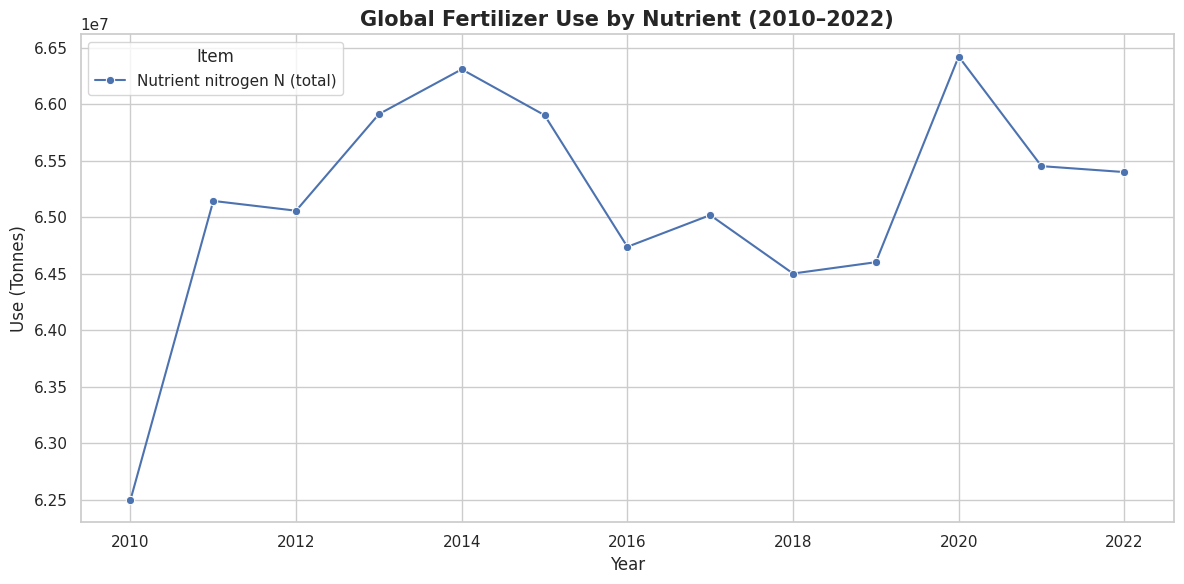

In [79]:
# Filter and group nutrient use data
nutrient_summary = fertilizers[
    (fertilizers["Year"].between(2010, 2022)) &
    (fertilizers["Element"] == "Agricultural Use") &
    (fertilizers["Item"].isin([
        "Nutrient nitrogen N (total)",
        "Nutrient phosphorus P2O5 (total)",
        "Nutrient potassium K2O (total)"
    ]))
].groupby(["Year", "Item"])["Value"].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=nutrient_summary, x="Year", y="Value", hue="Item", marker="o")
plt.title("Global Fertilizer Use by Nutrient (2010–2022)", fontsize=15, weight='bold')
plt.xlabel("Year")
plt.ylabel("Use (Tonnes)")
plt.tight_layout()
plt.show()


## Q5: Is fertilizer use increasing or decreasing in each country?

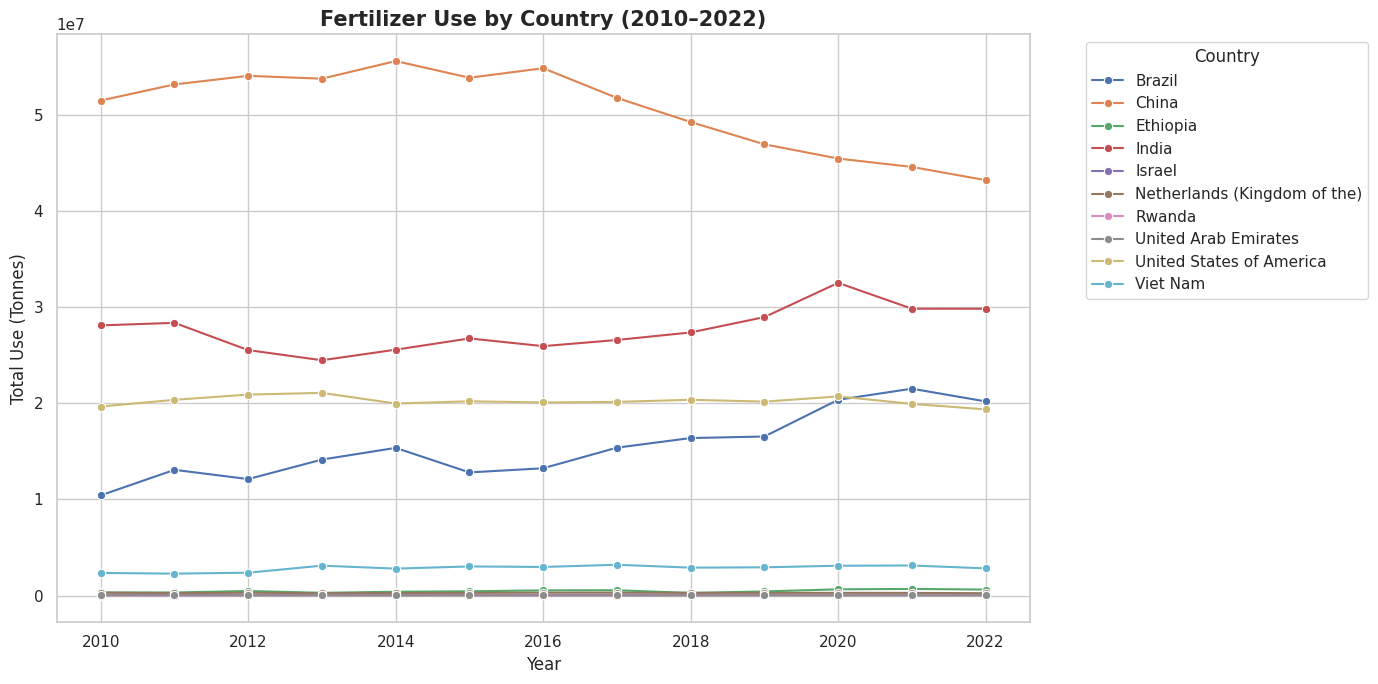

In [80]:
# Filter and summarize fertilizer use by country/year
country_trend = fertilizers[
    (fertilizers["Element"] == "Agricultural Use") &
    (fertilizers["Year"].between(2010, 2022))
].groupby(["Area", "Year"])["Value"].sum().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=country_trend, x="Year", y="Value", hue="Area", marker="o")
plt.title("Fertilizer Use by Country (2010–2022)", fontsize=15, weight="bold")
plt.xlabel("Year")
plt.ylabel("Total Use (Tonnes)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Q6A: Fertilizer Use per Hectare (Nitrogen only)

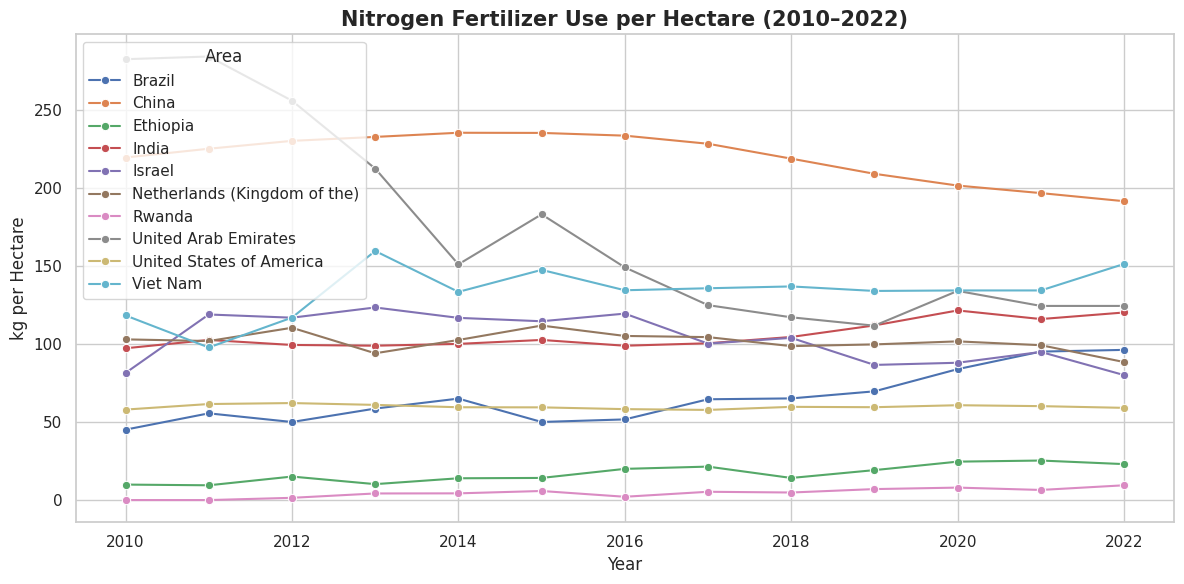

In [81]:
# Plot nitrogen use per hectare by country
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fertilizers[
        (fertilizers["Element"] == "Use per area of cropland") &
        (fertilizers["Item"] == "Nutrient nitrogen N (total)") &
        (fertilizers["Year"] >= 2010)
    ],
    x="Year", y="Value", hue="Area", marker="o"
)
plt.title("Nitrogen Fertilizer Use per Hectare (2010–2022)", fontsize=15, weight="bold")
plt.xlabel("Year")
plt.ylabel("kg per Hectare")
plt.tight_layout()
plt.show()


## Q6B: Fertilizer Use per Capita (Nitrogen only)

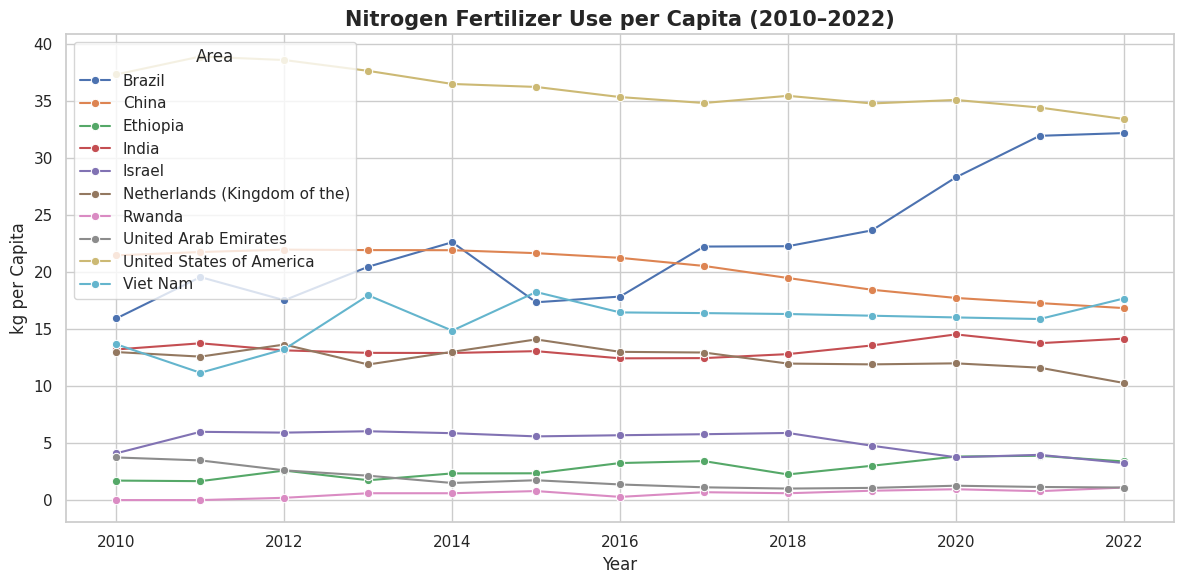

In [82]:
# Plot nitrogen use per capita by country
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fertilizers[
        (fertilizers["Element"] == "Use per capita") &
        (fertilizers["Item"] == "Nutrient nitrogen N (total)") &
        (fertilizers["Year"] >= 2010)
    ],
    x="Year", y="Value", hue="Area", marker="o"
)
plt.title("Nitrogen Fertilizer Use per Capita (2010–2022)", fontsize=15, weight="bold")
plt.xlabel("Year")
plt.ylabel("kg per Capita")
plt.tight_layout()
plt.show()


## Q7: Are countries with higher fertilizer use producing more crops?

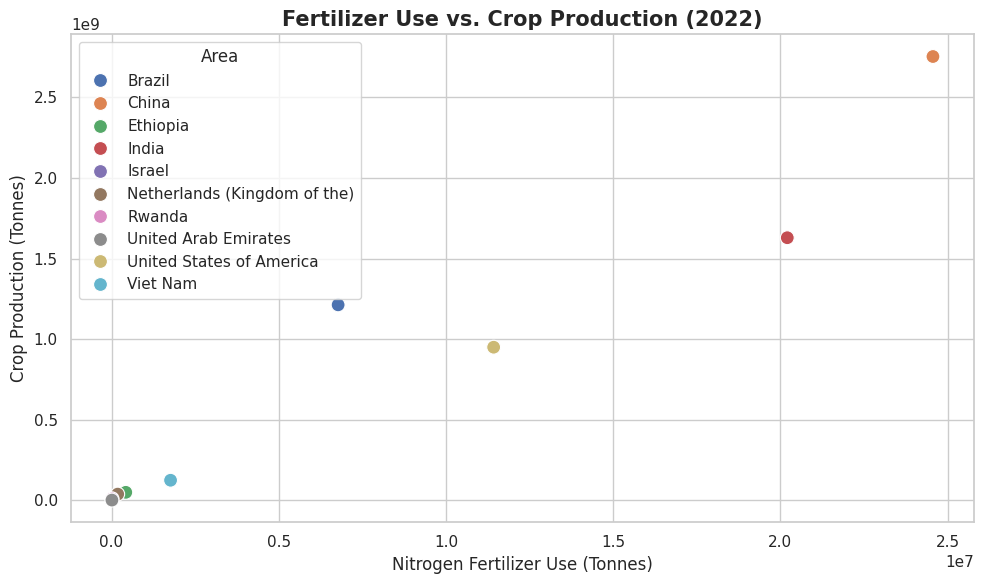

In [86]:
# Merge nitrogen use and crop production for 2022
fert_vs_crop = pd.merge(
    fertilizers[
        (fertilizers["Element"] == "Agricultural Use") &
        (fertilizers["Item"] == "Nutrient nitrogen N (total)") &
        (fertilizers["Year"] == 2022)
    ][["Area", "Value"]].rename(columns={"Value": "Fertilizer_Use"}),
    crops[
        (crops["Element"] == "Production") &
        (crops["Year"] == 2022)
    ][["Area", "Value"]].groupby("Area").sum().reset_index().rename(columns={"Value": "Crop_Production"}),
    on="Area"
)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fert_vs_crop, x="Fertilizer_Use", y="Crop_Production", hue="Area", s=100)
plt.title("Fertilizer Use vs. Crop Production (2022)", fontsize=15, weight='bold')
plt.xlabel("Nitrogen Fertilizer Use (Tonnes)")
plt.ylabel("Crop Production (Tonnes)")
plt.tight_layout()
plt.show()


## Q8: Which countries are the top producers of food crops and livestock?

C:\Users\omkar\AppData\Local\Temp\ipykernel_26856\1319701555.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_producers, x="Value", y="Area", palette="viridis")


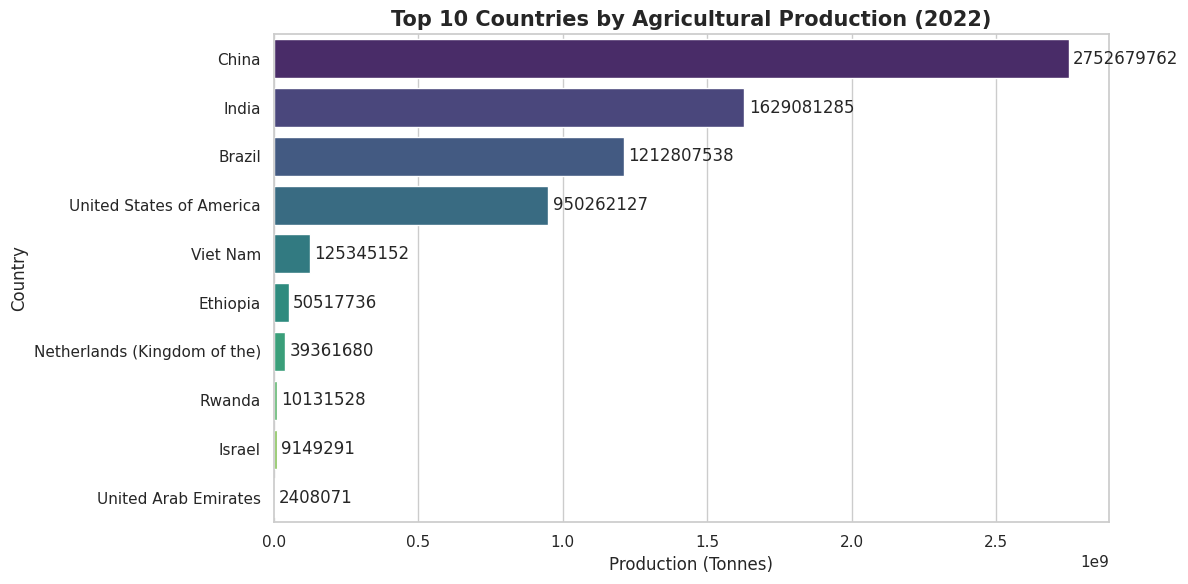

In [90]:
# Filter and group production data for 2022 (Top 10 only)
top_producers = crops[
    (crops["Element"] == "Production") &
    (crops["Year"] == 2022)
].groupby("Area")["Value"].sum().reset_index().sort_values("Value", ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_producers, x="Value", y="Area", palette="viridis")
plt.title("Top 10 Countries by Agricultural Production (2022)", fontsize=15, weight="bold")
plt.xlabel("Production (Tonnes)")
plt.ylabel("Country")

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.tight_layout()
plt.show()


## Q9: How have crop yields (production per hectare) changed over time?

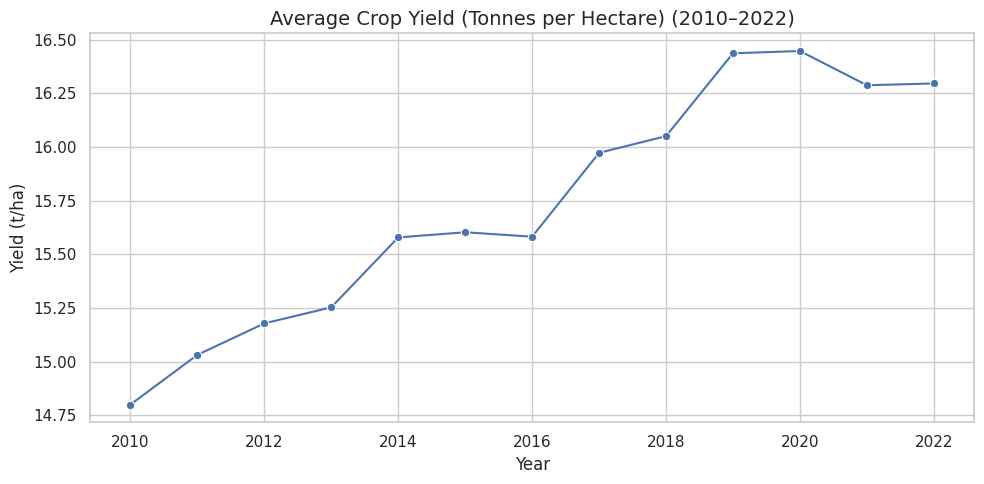

In [96]:
crops=area_df
# Filter area harvested
area_df = crop_df[
    (crop_df["Element"] == "Area harvested") &
    (crop_df["Year"] >= 2010) &
    (crop_df["Year"] <= 2022)
]

# Filter production
prod_df = crop_df[
    (crop_df["Element"] == "Production") &
    (crop_df["Year"] >= 2010) &
    (crop_df["Year"] <= 2022)
]

# Merge and calculate yield
yield_df = pd.merge(prod_df, area_df, on=["Area", "Item", "Year"], suffixes=("_prod", "_area"))
yield_df["Yield"] = yield_df["Value_prod"] / yield_df["Value_area"]
yield_df = yield_df[~yield_df["Yield"].isna() & ~yield_df["Yield"].isin([float('inf'), -float('inf')])]

# Average yield across all countries and crops
avg_yield = yield_df.groupby("Year")["Yield"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_yield, x="Year", y="Yield", marker="o")
plt.title("Average Crop Yield (Tonnes per Hectare) (2010–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.tight_layout()
plt.show()


## 10: Which crops have shown the most consistent growth across multiple countries?

C:\Users\omkar\AppData\Local\Temp\ipykernel_26856\7964224.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_crops, x="Countries with Growth", y="Crop", palette="crest")


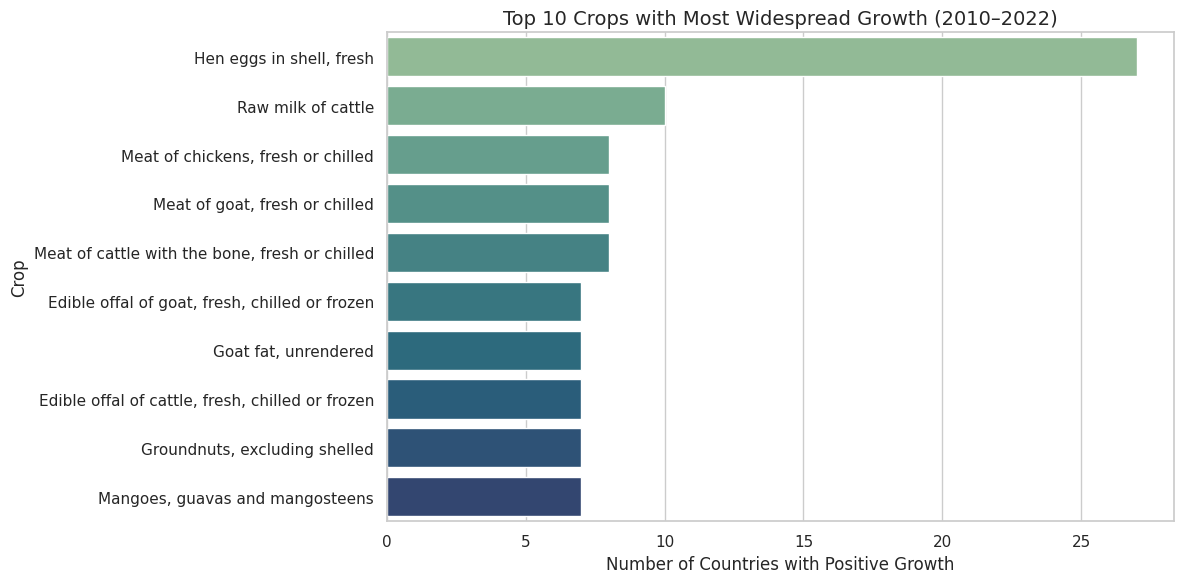

In [102]:
# Filter crop production for 2010 and 2022
prod_2010 = crop_df[(crop_df["Element"] == "Production") & (crop_df["Year"] == 2010)]
prod_2022 = crop_df[(crop_df["Element"] == "Production") & (crop_df["Year"] == 2022)]

# Merge both years on Area and Item
prod_growth = pd.merge(
    prod_2010[["Area", "Item", "Value"]],
    prod_2022[["Area", "Item", "Value"]],
    on=["Area", "Item"],
    suffixes=("_2010", "_2022")
)

# Calculate percentage growth
prod_growth["Growth (%)"] = ((prod_growth["Value_2022"] - prod_growth["Value_2010"]) / prod_growth["Value_2010"]) * 100

# Remove NaNs and infinite values
prod_growth = prod_growth.dropna(subset=["Growth (%)"])

# Count how many countries had positive growth per crop
crop_positive_growth = prod_growth[prod_growth["Growth (%)"] > 0]
crop_growth_count = crop_positive_growth["Item"].value_counts().reset_index()
crop_growth_count.columns = ["Crop", "Countries with Growth"]

# Select top 10 crops with most consistent growth
top_crops = crop_growth_count.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_crops, x="Countries with Growth", y="Crop", palette="crest")
plt.title("Top 10 Crops with Most Widespread Growth (2010–2022)", fontsize=14)
plt.xlabel("Number of Countries with Positive Growth")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()


## Q11: How has total food energy supply from major staples changed over time?

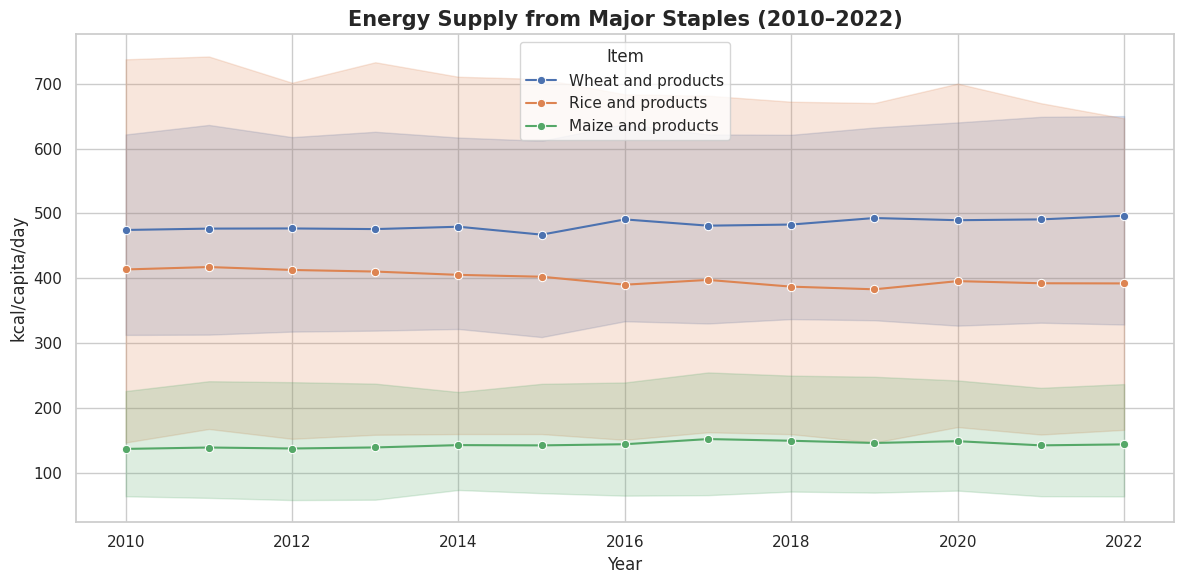

In [110]:
# Filter staple energy supply (kcal/capita/day)
staple_energy = food_supply[
    (food_supply["Item"].isin(["Wheat and products", "Rice and products", "Maize and products"])) &
    (food_supply["Element"] == "Food supply (kcal/capita/day)") &
    (food_supply["Year"] >= 2010)
]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=staple_energy, x="Year", y="Value", hue="Item", marker="o")
plt.title("Energy Supply from Major Staples (2010–2022)", fontsize=15, weight="bold")
plt.xlabel("Year")
plt.ylabel("kcal/capita/day")
plt.tight_layout()
plt.show()


## Q12: What is the food group composition for a selected country

C:\Users\omkar\AppData\Local\Temp\ipykernel_26856\1886736887.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_foods, x="Value", y="Item", palette="mako")


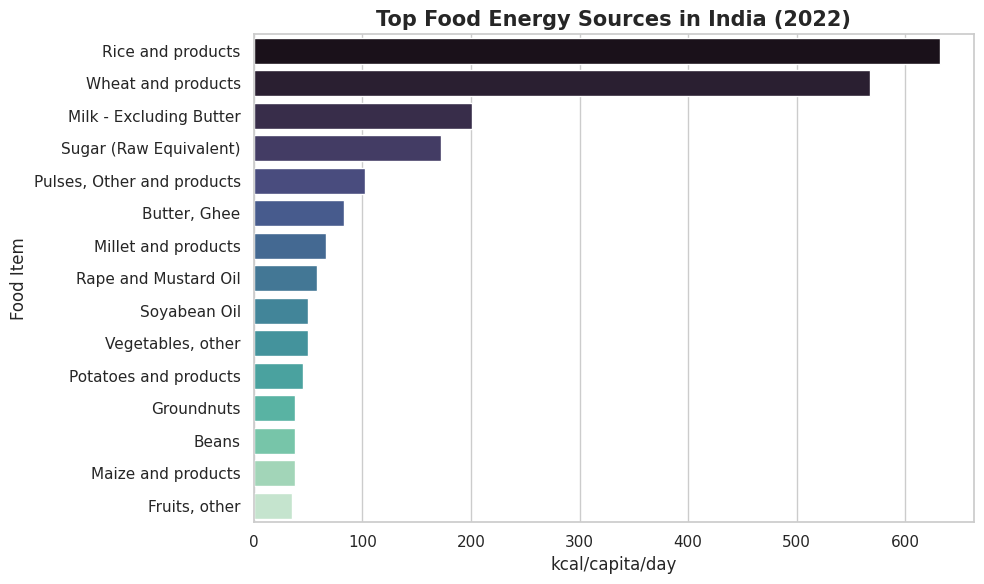

In [112]:
# Filter India's top food energy sources in 2022
top_foods = food_supply[
    (food_supply["Area"] == "India") &
    (food_supply["Year"] == 2022) &
    (food_supply["Element"] == "Food supply (kcal/capita/day)")
].sort_values("Value", ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_foods, x="Value", y="Item", palette="mako")
plt.title("Top Food Energy Sources in India (2022)", fontsize=15, weight="bold")
plt.xlabel("kcal/capita/day")
plt.ylabel("Food Item")
plt.tight_layout()
plt.show()


## Q13: Which countries consume the most calories from cereals (wheat + rice + maize)?

C:\Users\omkar\AppData\Local\Temp\ipykernel_26856\2498669252.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cereal_top, x="Value", y="Area", palette="YlGnBu")


AttributeError: module 'matplotlib.pyplot' has no attribute 's'

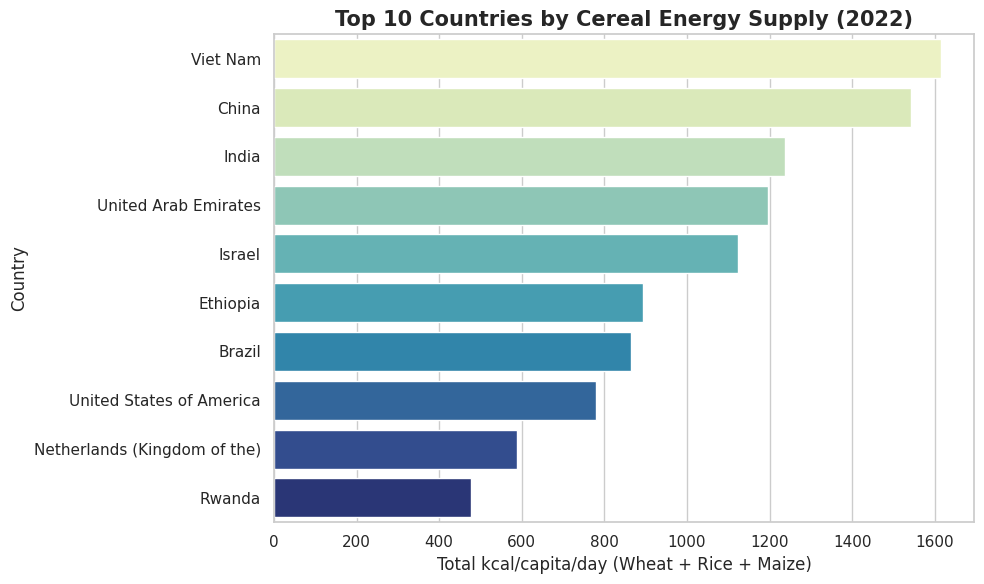

In [115]:
# Filter and summarize cereal energy in 2022
cereal_top = food_supply[
    (food_supply["Item"].isin(["Wheat and products", "Rice and products", "Maize and products"])) &
    (food_supply["Element"] == "Food supply (kcal/capita/day)") &
    (food_supply["Year"] == 2022)
].groupby("Area")["Value"].sum().reset_index().sort_values("Value", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=cereal_top, x="Value", y="Area", palette="YlGnBu")
plt.title("Top 10 Countries by Cereal Energy Supply (2022)", fontsize=15, weight="bold")
plt.xlabel("Total kcal/capita/day (Wheat + Rice + Maize)")
plt.ylabel("Country")
plt.tight_layout()
plt.s


## Q14: Which countries show a good balance of low emissions, high productivity, and good nutrition?

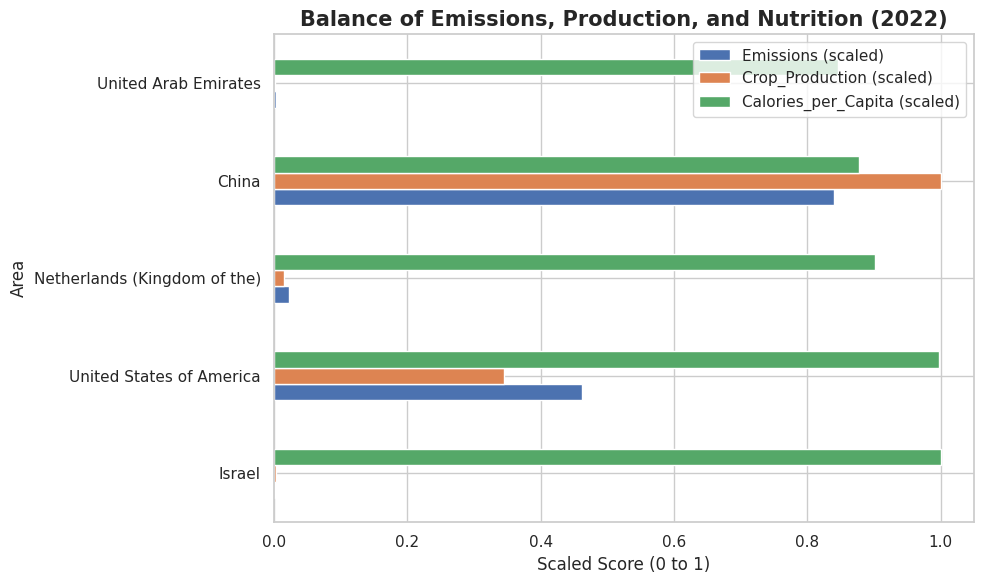

In [117]:
# Aggregate and normalize emissions, production, and nutrition
combined_df = pd.merge(
    emissions_df[(emissions_df["Year"] == 2022) & (emissions_df["Element"] == "Emissions (CO2eq) (AR5)")]
        .groupby("Area")["Value"].sum().reset_index().rename(columns={"Value": "Emissions"}),
    crop_df[(crop_df["Element"] == "Production") & (crop_df["Year"] == 2022)]
        .groupby("Area")["Value"].sum().reset_index().rename(columns={"Value": "Crop_Production"}),
    on="Area"
).merge(
    food_supply_df[(food_supply_df["Element"] == "Food supply (kcal/capita/day)") & (food_supply_df["Year"] == 2022)]
        .groupby("Area")["Value"].sum().reset_index().rename(columns={"Value": "Calories_per_Capita"}),
    on="Area"
)

# Normalize for comparison
for col in ["Emissions", "Crop_Production", "Calories_per_Capita"]:
    combined_df[f"{col} (scaled)"] = combined_df[col] / combined_df[col].max()

# Top 5 countries with high nutrition & production
top_combined = combined_df.sort_values(
    ["Calories_per_Capita (scaled)", "Crop_Production (scaled)"],
    ascending=False
).head(5)

# Plot
top_combined.set_index("Area")[[
    "Emissions (scaled)", "Crop_Production (scaled)", "Calories_per_Capita (scaled)"
]].plot(kind="barh", figsize=(10, 6))

plt.title("Balance of Emissions, Production, and Nutrition (2022)", fontsize=15, weight='bold')
plt.xlabel("Scaled Score (0 to 1)")
plt.tight_layout()
plt.show()


## Q15: Where are the biggest gaps between resource use (fertilizer/emissions) and food/nutritional output?

C:\Users\omkar\AppData\Local\Temp\ipykernel_26856\394570432.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_efficient, x="Emissions per 1000 kcal", y="Area", palette="rocket")


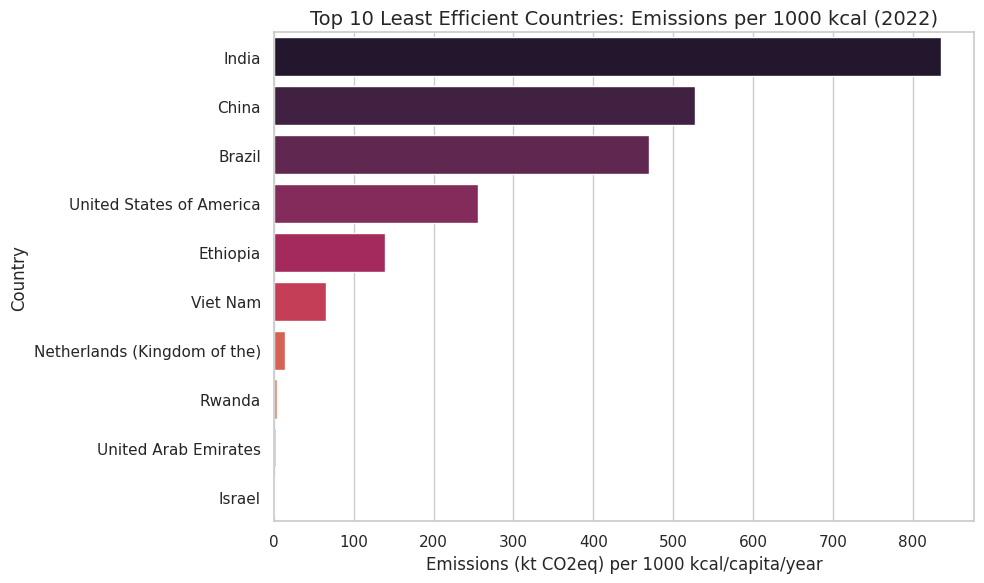

In [118]:
# Calculate emissions per 1000 kcal per capita per year
combined_df["Emissions per 1000 kcal"] = combined_df["Emissions"] / (combined_df["Calories_per_Capita"] * 365 / 1000)

# Top 10 least efficient countries
least_efficient = combined_df.sort_values("Emissions per 1000 kcal", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=least_efficient, x="Emissions per 1000 kcal", y="Area", palette="rocket")
plt.title("Top 10 Least Efficient Countries: Emissions per 1000 kcal (2022)", fontsize=14)
plt.xlabel("Emissions (kt CO2eq) per 1000 kcal/capita/year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
